### SWIGGY SALES ANALYSIS

#### IMPORT LIBIRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### IMPORT DATA

In [6]:
df = pd.read_excel(r"C:\SWIGGY\swiggy_data.xlsx")

In [9]:
df.head()


,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0


In [10]:
df.tail()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
197425,Sikkim,Gangtok,2025-01-25,Mama's Kitchen,Gangtok,Momos,Soya cheese chilli momo ...,112.0,4.4,0
197426,Sikkim,Gangtok,2025-07-02,Mama's Kitchen,Gangtok,Momos,Kurkure momo fried ...,140.0,4.4,0
197427,Sikkim,Gangtok,2025-03-25,Mama's Kitchen,Gangtok,Momos,Chilli cheese momo,126.0,4.4,0
197428,Sikkim,Gangtok,2025-03-26,Mama's Kitchen,Gangtok,Momos,Veg Momos (8 Pc),85.0,4.4,0
197429,Sikkim,Gangtok,2025-03-27,Mama's Kitchen,Gangtok,Momos,Soya Momo,100.0,4.4,0


#### METADATA

In [12]:
print("No. of Rows:",df.shape[0])

No. of Rows: 197430


In [13]:
print("No. of Fields:",df.shape[1])

No. of Fields: 10


In [14]:
df.info

<bound method DataFrame.info of             State       City Order Date           Restaurant Name  \
0       Karnataka  Bengaluru 2025-06-29  Anand Sweets & Savouries   
1       Karnataka  Bengaluru 2025-04-03     Srinidhi Sagar Deluxe   
2       Karnataka  Bengaluru 2025-01-15     Srinidhi Sagar Deluxe   
3       Karnataka  Bengaluru 2025-04-17     Srinidhi Sagar Deluxe   
4       Karnataka  Bengaluru 2025-03-13     Srinidhi Sagar Deluxe   
...           ...        ...        ...                       ...   
197425     Sikkim    Gangtok 2025-01-25            Mama's Kitchen   
197426     Sikkim    Gangtok 2025-07-02            Mama's Kitchen   
197427     Sikkim    Gangtok 2025-03-25            Mama's Kitchen   
197428     Sikkim    Gangtok 2025-03-26            Mama's Kitchen   
197429     Sikkim    Gangtok 2025-03-27            Mama's Kitchen   

                    Location     Category  \
0       Rajarajeshwari Nagar        Snack   
1                    Kengeri  Recommended   
2   

#### DATA TYPES

In [15]:
df.dtypes

State                         str
City                          str
Order Date         datetime64[us]
Restaurant Name               str
Location                      str
Category                      str
Dish Name                     str
Price (INR)               float64
Rating                    float64
Rating Count                int64
dtype: object

In [16]:
df.describe()

,Order Date,Price (INR),Rating,Rating Count
count,197430,197430.000000,197430.000000,197430.000000
mean,2025-05-01 19:41:20.996809,268.512920,4.341582,28.321805
min,2025-01-01 00:00:00,0.950000,1.500000,0.000000
25%,2025-03-01 00:00:00,139.000000,4.300000,0.000000
50%,2025-05-02 00:00:00,229.000000,4.400000,2.000000
75%,2025-07-01 00:00:00,329.000000,4.500000,15.000000
max,2025-08-31 00:00:00,8000.000000,5.000000,999.000000
std,NaN,219.338363,0.422585,87.542593


#### KPI'S

##### TOTAL SALES

In [20]:
total_sales=df["Price (INR)"].sum()
print("Total Sales (INR):" , round(total_sales,2))

Total Sales (INR): 53012505.77


##### AVERAGE RATING

In [23]:
average_rating=df["Rating"].mean()
print("Average Rating:" , round(average_rating,1))

Average Rating: 4.3


In [24]:
average_order_value=df["Price (INR)"].mean()
print("Average order value (INR):" , round(average_order_value,2))

Average order value (INR): 268.51


##### RATINGS COUNT

In [25]:
ratings_count=df["Rating Count"].sum()
print("Ratings Count:" , round(ratings_count,2))

Ratings Count: 5591574


##### TOTAL ORDERS

In [28]:
total_orders=len(df)
print("Total Orders:" , round(total_orders,2))

Total Orders: 197430


### CHARTS DESIGN

##### MONTHLY SALES TREND

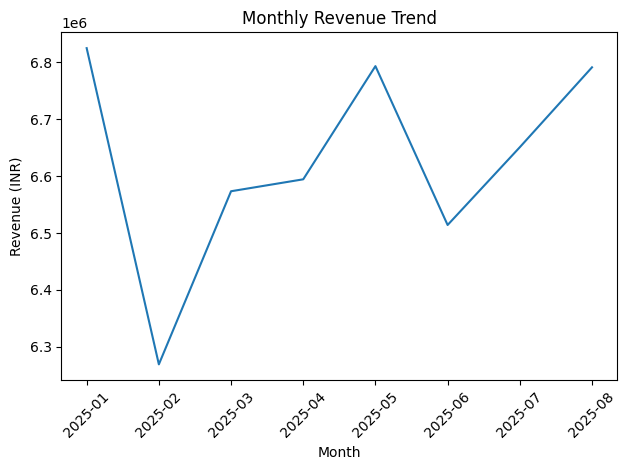

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


df["Order Date"] = pd.to_datetime(df["Order Date"])


df["YearMonth"] = df["Order Date"].dt.to_period("M").astype(str)


monthly_revenue = df.groupby("YearMonth")["Price (INR)"].sum().reset_index()


plt.figure()
plt.plot(monthly_revenue["YearMonth"], monthly_revenue["Price (INR)"])
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Revenue (INR)")
plt.title("Monthly Revenue Trend")
plt.tight_layout()
plt.show()

##### DAILY SALES TREND

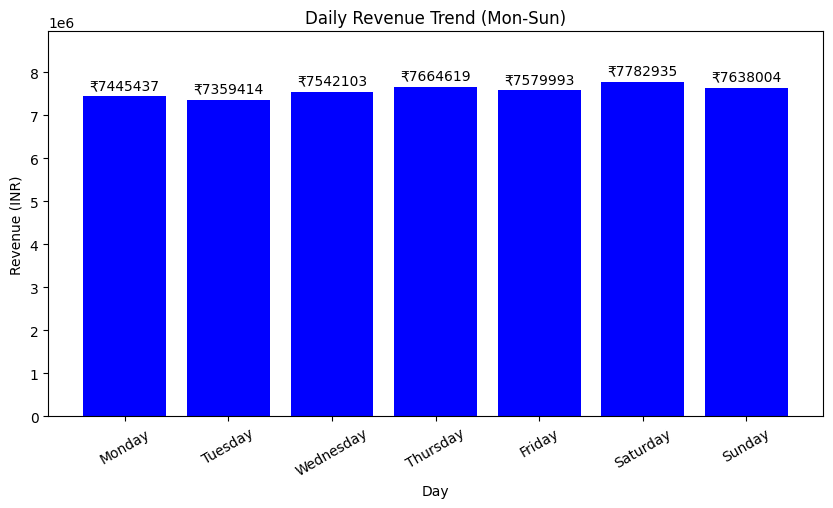

In [35]:
df["DayName"] = pd.to_datetime(df["Order Date"]).dt.day_name()

daily_revenue = (
    df.groupby("DayName")["Price (INR)"]
    .sum()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
)

plt.figure(figsize=(10, 5))

bars = plt.bar(daily_revenue.index, daily_revenue.values, color='blue')


plt.bar_label(bars, padding=3, fmt='₹%.0f')

plt.title("Daily Revenue Trend (Mon-Sun)")
plt.xlabel("Day")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=30)

plt.ylim(0, daily_revenue.max() * 1.15)
plt.show()

##### TOTAL SALES BY FOOD TYPE (VEG VS NON-VEG)

In [36]:
import numpy as np


non_veg_keywords = [
    "chicken", "egg", "fish", "mutton",
    "prawn", "biryani", "kabab", "kebab",
    "non-veg", "non veg"
]


df["Food Category"] = np.where(
    df["Dish Name"].str.lower().str.contains("|".join(non_veg_keywords), na=False),
    "Non-Veg",
    "Veg"
)


food_revenue = (
    df.groupby("Food Category")["Price (INR)"]
    .sum()
    .reset_index()
)


print(food_revenue)

  Food Category  Price (INR)
0       Non-Veg  19684002.06
1           Veg  33328503.71


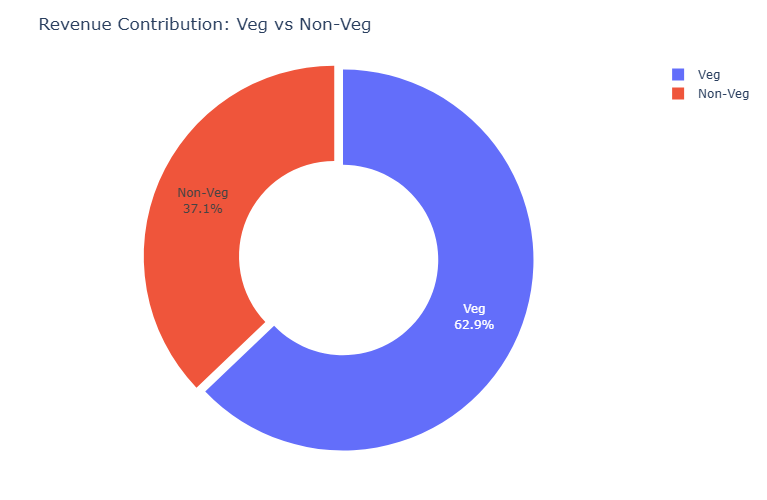

In [37]:
import plotly.express as px


fig = px.pie(
    food_revenue, 
    values="Price (INR)", 
    names="Food Category", 
    hole=0.5,
    title="Revenue Contribution: Veg vs Non-Veg"
)


fig.update_traces(
    textinfo="percent+label", 
    pull=[0.05, 0] 
)


fig.update_layout(
    height=500, 
    margin=dict(t=60, b=40, l=40, r=40)
)


fig.show()

##### TOTAL SALES BY STATE

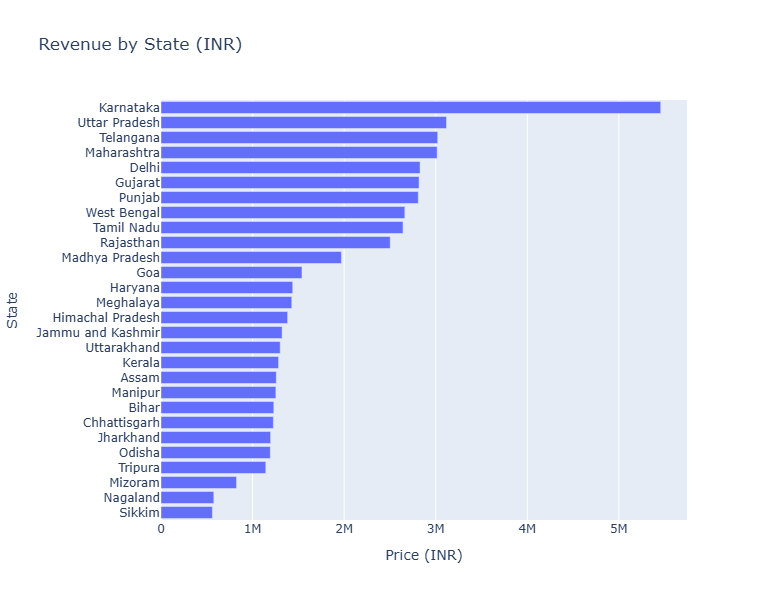

In [39]:
import plotly.express as px


state_sales = (
    df.groupby("State", as_index=False)["Price (INR)"]
    .sum()
    .sort_values("Price (INR)", ascending=False)
)


fig = px.bar(
    state_sales,
    x="Price (INR)",
    y="State",
    orientation="h",
    title="Revenue by State (INR)"
)


fig.update_layout(
    height=600, 
    yaxis=dict(autorange="reversed")
)


fig.show()

##### QUATERLY PERFORMANCE SUMMARY

In [40]:

df["Order_Date"] = pd.to_datetime(df["Order Date"])

df["Quarter"] = df["Order_Date"].dt.to_period("Q").astype(str)


quarterly_summary = (
    df.groupby("Quarter", as_index=False)
    .agg(
        Total_Sales=("Price (INR)", "sum"),
        Avg_Rating=("Rating", "mean"),
        Total_Orders=("Order_Date", "count")
    )
    .sort_values("Quarter")
)


quarterly_summary["Total_Sales"] = quarterly_summary["Total_Sales"].round(0)
quarterly_summary["Avg_Rating"] = quarterly_summary["Avg_Rating"].round(2)


quarterly_summary

,Quarter,Total_Sales,Avg_Rating,Total_Orders
0,2025Q1,19667822.0,4.34,73096
1,2025Q2,19902257.0,4.34,74163
2,2025Q3,13442427.0,4.34,50171


##### TOP 5 CITES BY SALES

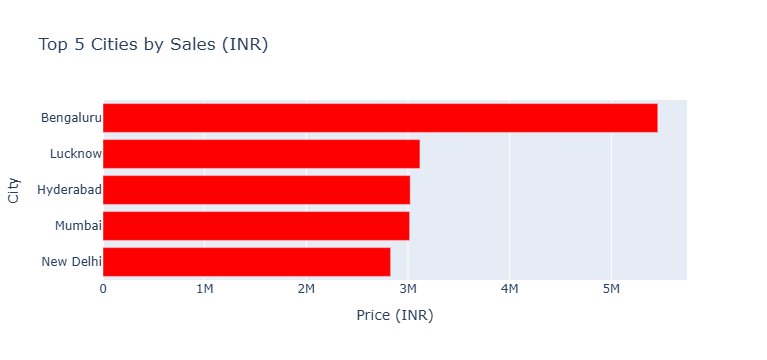

In [41]:
top_5_cities = (
    df.groupby("City")["Price (INR)"]
    .sum()
    .nlargest(5)
    .sort_values()
    .reset_index()
)

fig = px.bar(
    top_5_cities,
    x="Price (INR)",
    y="City",
    orientation="h",
    title="Top 5 Cities by Sales (INR)",
    color_discrete_sequence=["red"]
)

fig.show()

#####  Weekly Trend Analysis 

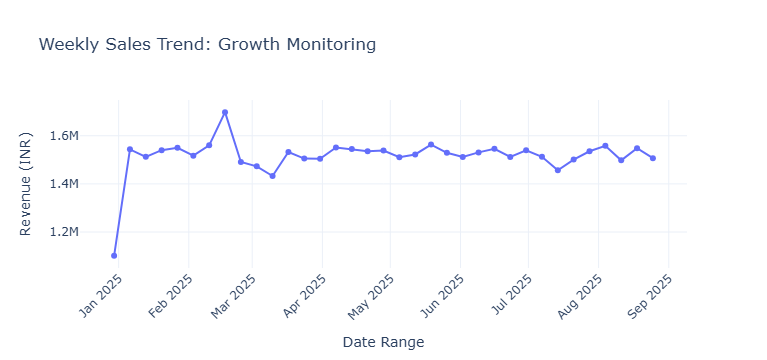

In [44]:
import plotly.express as px


df["Week_Start"] = pd.to_datetime(df["Order Date"]).dt.to_period("W").dt.start_time


weekly_revenue = df.groupby("Week_Start")["Price (INR)"].sum().reset_index()


fig = px.line(
    weekly_revenue,
    x="Week_Start",
    y="Price (INR)",
    title="Weekly Sales Trend: Growth Monitoring",
    markers=True,
    template="plotly_white"
)


fig.update_xaxes(
    dtick="M1",            
    tickformat="%b %Y",    
    tickangle=-45,         
    title_text="Date Range"
)

fig.update_layout(
    yaxis_title="Revenue (INR)",
    hovermode="x unified"
)

fig.show()